# Imports

In [3]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


# Working with a dataset

##Load and explore the dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['0','1','2','3','4','5','6','7','8','9']


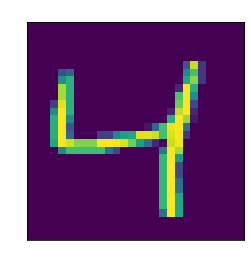

In [7]:
plt.imshow(train_images[2])
plt.title(class_names[train_labels[2]])
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [18]:
train_images = (train_images-np.mean(train_images)) / np.std(train_images)
#train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images / 255.0))

test_images = (test_images-np.mean(test_images)) / np.std(test_images)
#test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255.0))

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

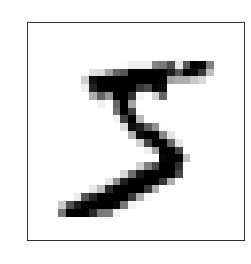

In [19]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

## Explore final dataset

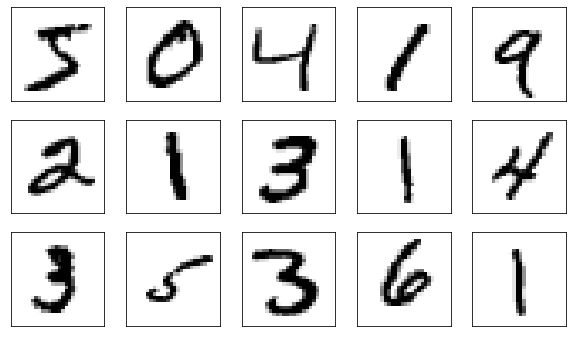

In [20]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(784, activation='relu'),
    Dense(196, activation='relu'),
    Dense(49, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 196)               153860    
_________________________________________________________________
dense_14 (Dense)             (None, 49)                9653      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                500       
Total params: 779,453
Trainable params: 779,453
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=10
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 216us/sample - loss: 0.2262 - accuracy: 0.9311 - val_loss: 0.1754 - val_accuracy: 0.9478
Epoch 2/10
42000/42000 [==============================] - 8s 200us/sample - loss: 0.1110 - accuracy: 0.9668 - val_loss: 0.1271 - val_accuracy: 0.9627
Epoch 3/10
42000/42000 [==============================] - 8s 196us/sample - loss: 0.0808 - accuracy: 0.9743 - val_loss: 0.1204 - val_accuracy: 0.9661
Epoch 4/10
42000/42000 [==============================] - 8s 199us/sample - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.1067 - val_accuracy: 0.9720
Epoch 5/10
42000/42000 [==============================] - 8s 197us/sample - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.1195 - val_accuracy: 0.9704
Epoch 6/10
42000/42000 [==============================] - 9s 205us/sample - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.1199 - val_accuracy: 0.9688
Epoch 7/10
42000/42000 [==========================

# Evaluate

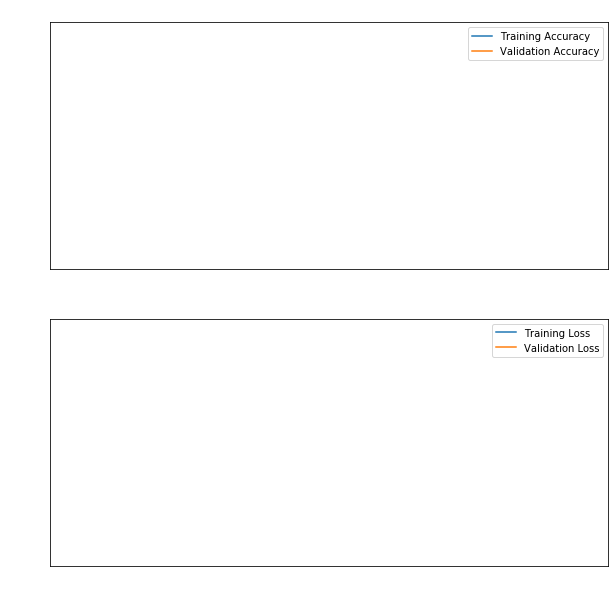

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.12879663397633775
Accuracy: 0.9761


# Make predictions

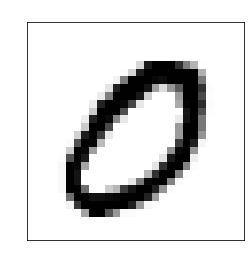


Predicted class is: 0


In [33]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

8192/7888 [===============================] - 0s 0us/step

Predicted class is: 8


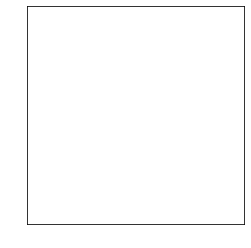

In [40]:
#La imagen no se ve y creo que es debido a la extensión del archivo, sinb embargo fue capaz de detectar que fue un numero 8 el que estaba dibujado en el
test_image = tf.keras.utils.get_file('car.png','https://www.clipartwiki.com/clipimg/full/96-963130_number-8-png-circle.png')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])